In [ ]:
import numpy as np
from funcoes import fft_dec, zero_padding

def overlap_add(x, h, M0=None):
    x = np.asarray(x)
    h = np.asarray(h)

    L = len(h)               
    # Define o tamanho do bloco se não especificado
    if M0 is None:
        M0 = 4 * L  # Valor padrão 4 vezes o comprimento de h   

    N = M0 + L - 1  
    # filtro com zero-padding até próxima potência de 2
    h_padded = zero_padding(h, N - L)
    h_padded = zero_padding(h_padded)  
    Nfft = len(h_padded)

    # FFT do filtro
    H = fft_dec(h_padded)

    # número de blocos
    num_blocos = int(np.ceil(len(x) / M0))

    # saída
    y = np.zeros(len(x) + L - 1)

    for i in range(num_blocos):
        # extrair bloco
        inicio = i * M0
        fim = min(inicio + M0, len(x))
        bloco = x[inicio:fim]

        # Zero-padding do bloco
        bloco_padded = zero_padding(bloco, Nfft - len(bloco))

        # FFT do bloco
        X = fft_dec(bloco_padded)
        Y = X * H

        # IFFT
        y_bloco = np.fft.ifft(Y).real
        # comprimento válido do resultado
        len_valida = len(bloco) + L - 1
        
        # Acumula no resultado
        y[inicio:inicio+len_valida] += y_bloco[:len_valida]

    return y


In [4]:
x_n = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1])  # M = 10
h_n = np.array([1, 1])  # L = 2

y = overlap_add(x_n, h_n, M0=4)
y_np = np.convolve(x_n, h_n)

print("Resultado OLA:", y)
print("Resultado np.convolve:", y_np)


Resultado OLA: [ 1.00000000e+00  8.62255189e-18  4.33170214e-17  8.62255189e-18
  0.00000000e+00  8.62255189e-18  4.33170214e-17  8.62255189e-18
  0.00000000e+00  9.81307787e-18 -1.00000000e+00]
Resultado np.convolve: [ 1  0  0  0  0  0  0  0  0  0 -1]


In [5]:
erro_absoluto = np.abs(y - y_np)
print("Erro absoluto:", erro_absoluto)

Erro absoluto: [0.00000000e+00 8.62255189e-18 4.33170214e-17 8.62255189e-18
 0.00000000e+00 8.62255189e-18 4.33170214e-17 8.62255189e-18
 0.00000000e+00 9.81307787e-18 0.00000000e+00]


In [6]:
erro_mse = np.mean((y - y_np) ** 2)
print("MSE:", erro_mse)


MSE: 3.769471626228538e-34


In [7]:
erro_relativo = np.linalg.norm(y - y_np) / np.linalg.norm(y_np)
print("Erro relativo:", erro_relativo)


Erro relativo: 4.553250920414661e-17


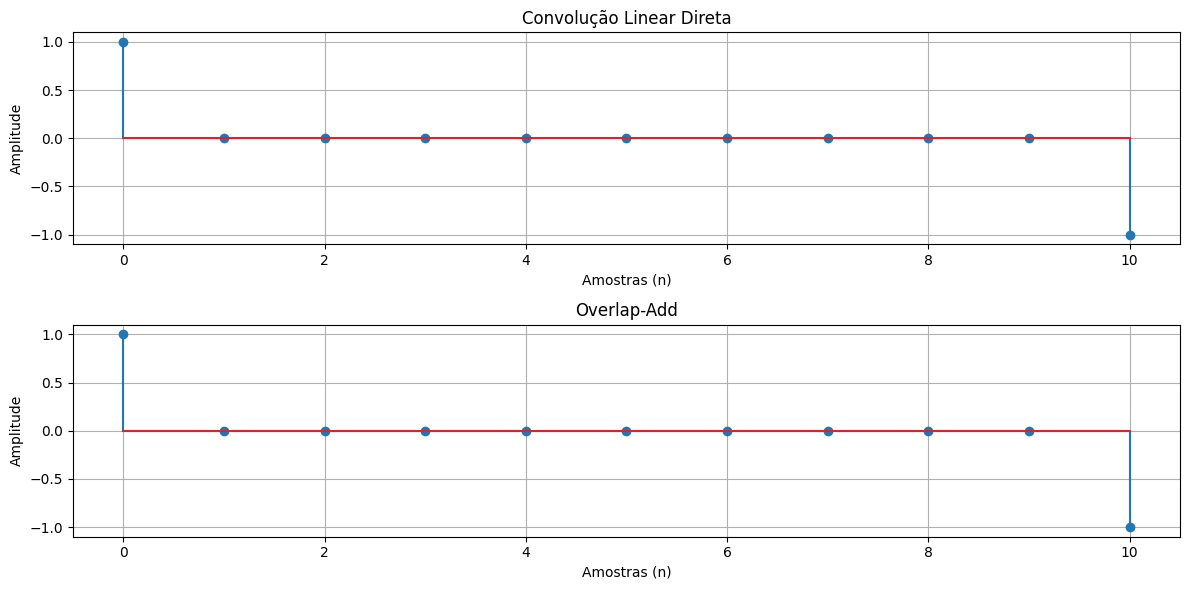

In [8]:
import matplotlib.pyplot as plt
y_direto = np.convolve(x_n, h_n, mode='full')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(y_np)
plt.title("Convolução Linear Direta")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(y[:len(y_np)])
plt.title("Overlap-Add")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()